## Лабораторная работа №1

## РЕШЕНИЕ КРАЕВЫХ ЗАДАЧ МЕТОДОМ АППРОКСИМАЦИЙ

Задание 1) 
$$\begin{eqnarray}
y'' &+& (1 &+& x^2)y &=& -1 \\
\end{eqnarray}$$
Задание 2)
$$ay'' + (1 + bx^2)y = -1 $$
Исходные данные:
$$a = \sin(k)$$
$$b = \cos(k), $$
где $k = 13$ - номер варианта.


  Краевые условия: $$y(1) = 0 $$ $$y(-1) = 0 $$

In [3]:
from matplotlib import pyplot as plt
import numpy as np

from scipy.sparse import diags

Можно заметить, что первое уравнение соответсвует второму при a = b = 1. Т.е. меняются только коэффициенты, что не влияет на ход решения. Поэтому опишем "универсальную" функцию. 

In [4]:
def Q(x, h, a, b):
    return (-2 * a - h**2 * (1 + b * x**2))/a

def func(n, a, b):
    x_0 = -1
    x_n = 1
    
    h = (x_n - x_0) / n
    N = n + 1
    X = np.arange(x_0, x_n + h, h)
    
    diagonals = [[Q(x, h, a, b) for x in X[1:-1]], [ 1 for _ in range(N - 2)], [1 for _ in range(N - 2)]]
    A = diags(diagonals, [0, -1, 1]).toarray()
    b = np.array([-h**2 / a for _ in range(N-2)])
    
    Y = np.zeros(N)
    Y[1:-1]= np.linalg.solve(A, b)
    
    return X, Y

Задание 1)

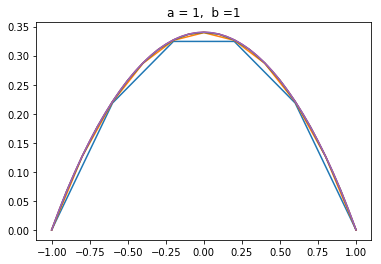

In [5]:
for n in [5, 10, 20, 40, 200]:
    X, Y = func(n, 1, 1)     
    plt.plot(X, Y)
    plt.title('a = 1,  b =1')
plt.show()


Задание 2)

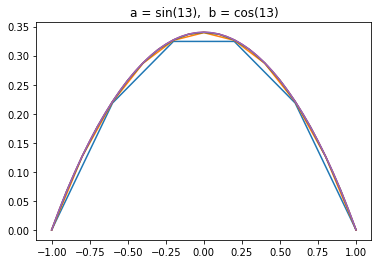

In [6]:
for n in [5, 10, 20, 40, 200]:
    X, Y = func(n, 1, 1)     
    plt.plot(X, Y)
    plt.title('a = sin(13),  b = cos(13)')
plt.show()
